In [99]:
# import necessay libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [100]:
#read dataframe
df_1= pd.read_csv('Premier League Player Stats.csv')
df_2=pd.read_json('fpl_data_2019_2020.json')

In [101]:
# Inspect data
df_1.head()

,Rank,PLAYER,TEAM,GP,GS,MIN,G,ASST,SHOTS,SOG
0,1,Jamie Vardy,Leicester City,35,34,3034,23,5,71,43
1,2,Danny Ings,Southampton,38,32,2812,22,2,66,38
2,3,Pierre-Emerick Aubameyang,Arsenal,36,35,3138,22,3,70,42
3,4,Raheem Shaquille Sterling,Manchester City,33,30,2660,20,1,68,38
4,5,Mohamed Salah Ghaly,Liverpool,34,33,2884,19,10,95,59


In [102]:
df_2.head()

,Max Aarons,Abdul Rahman Baba,Tammy Abraham,Che Adams,Dennis Adeniran,Albert Adomah,Adrián,Adrien Silva,Benik Afobe,Sergio Agüero,...,Pablo Zabaleta,Wilfried Zaha,Davide Zappacosta,Marvin Zeegelaar,Jordan Zemura,Karlo Ziger,Christoph Zimmermann,Oleksandr Zinchenko,Nabili Zoubdi Touaizi,Kurt Zouma
Club,Norwich City,Defender,Chelsea,Southampton,Everton,Midfielder,Liverpool,Midfielder,Forward,Manchester City,...,West Ham United,Crystal Palace,Defender,Watford,Defender,Goalkeeper,Norwich City,Manchester City,Forward,Chelsea
Position,Defender,Defender,Forward,Midfielder,Midfielder,Midfielder,Goalkeeper,Midfielder,Forward,Forward,...,Defender,Forward,Defender,Defender,Defender,Goalkeeper,Defender,Defender,Forward,Defender
Appearances,19,15,53,15,0,2,135,14,63,254,...,299,198,26,12,0,0,10,31,0,133
Goals,0,0,17,0,0,0,0,0,10,174,...,9,35,1,0,0,0,0,0,0,4
Wins,2,6,17,5,0,1,55,4,19,171,...,155,64,17,4,0,0,1,28,0,54


In [103]:
# make df_2's column row and the column row

In [104]:
df_2=df_2.T

In [105]:
# make index a column

In [106]:
df_2=df_2.reset_index()

In [107]:
# rename column to players name

In [108]:
df_2.rename(columns={'index':'Player'},inplace = True)

In [109]:
df_2.head()

,Player,Club,Position,Appearances,Goals,Wins,Losses,Defence,Clean sheets,Goals conceded,...,Saves,Penalties saved,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Successful 0/0s,Successful /s
0,Max Aarons,Norwich City,Defender,19,0,2,12,,2,37,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Abdul Rahman Baba,Defender,Defender,15,0,6,6,,2,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Tammy Abraham,Chelsea,Forward,53,17,17,24,,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Che Adams,Southampton,Midfielder,15,0,5,8,,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Dennis Adeniran,Everton,Midfielder,0,0,0,0,,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
# Rename columns in df_1 dataframe
df_1.rename(columns={'PLAYER':'Player','TEAM':'Team','GP':'Game_Played','GS':'Games_Started','MIN':'Minutes_Played','SHOTS':'Shot','G':'Goals_Scored','ASST':'Assist','SOG':'Shots_On_Goal'},inplace =True)

In [111]:
# reinspect data columns
df_1.head()

,Rank,Player,Team,Game_Played,Games_Started,Minutes_Played,Goals_Scored,Assist,Shot,Shots_On_Goal
0,1,Jamie Vardy,Leicester City,35,34,3034,23,5,71,43
1,2,Danny Ings,Southampton,38,32,2812,22,2,66,38
2,3,Pierre-Emerick Aubameyang,Arsenal,36,35,3138,22,3,70,42
3,4,Raheem Shaquille Sterling,Manchester City,33,30,2660,20,1,68,38
4,5,Mohamed Salah Ghaly,Liverpool,34,33,2884,19,10,95,59


In [112]:
#Findout if there are null values
df_1.isna().sum()


Rank              0
Player            0
Team              0
Game_Played       0
Games_Started     0
Minutes_Played    0
Goals_Scored      0
Assist            0
Shot              0
Shots_On_Goal     0
dtype: int64

# Descriptive Statistics

### 1.Which team has the most players with 10+ goals scored in a season


In [115]:
teams_over_10_goals=df_1[df_1['Goals_Scored']> 10].groupby('Team')['Player'].count().sort_values(ascending = False)
teams_over_10_goals

Team
Manchester City            5
Everton                    2
Liverpool                  2
Manchester United          2
Tottenham Hotspur          2
Arsenal                    1
Burnley                    1
Chelsea                    1
Leicester City             1
Norwich City               1
Southampton                1
Wolverhampton Wanderers    1
Name: Player, dtype: int64

In [116]:
# Manchester City has the highest ammount of players with goals above 10 

### 2.Who are these players


In [118]:
df_1[(df_1['Goals_Scored']>10)&(df_1['Team']=='Manchester City')].sort_values(by ='Goals_Scored',ascending = False)

,Rank,Player,Team,Game_Played,Games_Started,Minutes_Played,Goals_Scored,Assist,Shot,Shots_On_Goal
3,4,Raheem Shaquille Sterling,Manchester City,33,30,2660,20,1,68,38
10,11,Sergio Leonel Agüero del Castillo,Manchester City,24,18,1456,16,3,54,28
12,13,Gabriel Fernando de Jesus,Manchester City,34,21,2027,14,7,81,48
14,15,Kevin De Bruyne,Manchester City,35,32,2798,13,20,70,31
18,19,Riyad Mahrez,Manchester City,33,21,1940,11,9,51,32


### 3.What is the average minutes played per game for players who score 5+ goals per game

In [120]:
over_5_goals_average_minutes = df_1[df_1['Goals_Scored']>5]['Minutes_Played'].mean()
over_5_goals_average_minutes/38

60.889060887512905

In [121]:
# 60.889060887512905 is the average minutes played per game

### 4.Which position (e.g.forward,midfielder,defender) has the highest average shots on goal per game?

In [123]:
df_1.head()

,Rank,Player,Team,Game_Played,Games_Started,Minutes_Played,Goals_Scored,Assist,Shot,Shots_On_Goal
0,1,Jamie Vardy,Leicester City,35,34,3034,23,5,71,43
1,2,Danny Ings,Southampton,38,32,2812,22,2,66,38
2,3,Pierre-Emerick Aubameyang,Arsenal,36,35,3138,22,3,70,42
3,4,Raheem Shaquille Sterling,Manchester City,33,30,2660,20,1,68,38
4,5,Mohamed Salah Ghaly,Liverpool,34,33,2884,19,10,95,59


In [124]:
df_2.head()

,Player,Club,Position,Appearances,Goals,Wins,Losses,Defence,Clean sheets,Goals conceded,...,Saves,Penalties saved,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Successful 0/0s,Successful /s
0,Max Aarons,Norwich City,Defender,19,0,2,12,,2,37,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Abdul Rahman Baba,Defender,Defender,15,0,6,6,,2,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Tammy Abraham,Chelsea,Forward,53,17,17,24,,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Che Adams,Southampton,Midfielder,15,0,5,8,,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Dennis Adeniran,Everton,Midfielder,0,0,0,0,,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [125]:
# df_1 dataset has no player positions, but df_2 has the player position

In [126]:
# extract valuable information from df_2 dataset

In [127]:
player_position = df_2[['Player','Position']]

In [128]:
player_position.head()

,Player,Position
0,Max Aarons,Defender
1,Abdul Rahman Baba,Defender
2,Tammy Abraham,Forward
3,Che Adams,Midfielder
4,Dennis Adeniran,Midfielder


In [129]:
df_1.head(10)

,Rank,Player,Team,Game_Played,Games_Started,Minutes_Played,Goals_Scored,Assist,Shot,Shots_On_Goal
0,1,Jamie Vardy,Leicester City,35,34,3034,23,5,71,43
1,2,Danny Ings,Southampton,38,32,2812,22,2,66,38
2,3,Pierre-Emerick Aubameyang,Arsenal,36,35,3138,22,3,70,42
3,4,Raheem Shaquille Sterling,Manchester City,33,30,2660,20,1,68,38
4,5,Mohamed Salah Ghaly,Liverpool,34,33,2884,19,10,95,59
5,6,Sadio Mané,Liverpool,35,31,2753,18,7,66,36
6,7,Harry Kane,Tottenham Hotspur,29,29,2589,18,2,62,37
7,8,Raúl Alonso Jiménez Rodríguez,Wolverhampton Wanderers,38,37,3244,17,6,89,44
8,9,Marcus Rashford,Manchester United,31,31,2653,17,7,77,44
9,10,Anthony Martial,Manchester United,32,31,2638,17,6,59,40


In [130]:
# inspect both datasets

In [131]:
player_position=player_position.dropna()

In [132]:
player_position.isna().sum()

Player      0
Position    0
dtype: int64

In [133]:
df_1[df_1['Player'].str.contains('Al')]

,Rank,Player,Team,Game_Played,Games_Started,Minutes_Played,Goals_Scored,Assist,Shot,Shots_On_Goal
7,8,Raúl Alonso Jiménez Rodríguez,Wolverhampton Wanderers,38,37,3244,17,6,89,44
22,23,Alexandre Lacazette,Arsenal,30,22,1877,10,4,44,26
34,35,Bamidele Alli,Tottenham Hotspur,25,21,1851,8,4,35,19
65,66,Trent Alexander-Arnold,Liverpool,38,35,3176,4,13,27,13
67,68,Alex Oxlade-Chamberlain,Liverpool,30,17,1492,4,1,22,10
74,75,Miguel Ángel Almirón Rejala,Newcastle United,36,35,3033,4,2,37,17
79,80,Marcos Alonso,Chelsea,18,15,1432,4,2,19,8
104,105,Allan Saint-Maximin,Newcastle United,26,23,1870,3,4,32,21
137,138,Tanguy Ndombèlé Alvaro,Tottenham Hotspur,21,12,1007,2,2,6,4
140,141,Toby Alderweireld,Tottenham Hotspur,33,33,2958,2,2,13,4


In [134]:
# there are disparities in the datasets 

In [135]:
# merge the data based on their name

In [136]:
new_epl_data = pd.merge(df_1,player_position,on='Player',how = 'outer')

In [137]:
new_epl_data.isna().sum()

Rank              532
Player              0
Team              532
Game_Played       532
Games_Started     532
Minutes_Played    532
Goals_Scored      532
Assist            532
Shot              532
Shots_On_Goal     532
Position          159
dtype: int64

In [138]:
new_epl_data= new_epl_data.dropna()

In [139]:
new_epl_data

,Rank,Player,Team,Game_Played,Games_Started,Minutes_Played,Goals_Scored,Assist,Shot,Shots_On_Goal,Position
2,87.0,Aaron Cresswell,West Ham United,31.0,31.0,2730.0,3.0,0.0,14.0,5.0,Defender
6,298.0,Aaron Ramsdale,Bournemouth,37.0,37.0,3330.0,0.0,1.0,0.0,0.0,Goalkeeper
9,363.0,Aaron Wan-Bissaka,Manchester United,35.0,34.0,3072.0,0.0,4.0,5.0,1.0,Defender
11,83.0,Abdoulaye Doucouré,Watford,37.0,36.0,3167.0,4.0,2.0,41.0,12.0,Midfielder
14,530.0,Adalberto Peñaranda,Watford,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Forward
...,...,...,...,...,...,...,...,...,...,...,...
1053,307.0,Yan Valery,Southampton,11.0,10.0,782.0,0.0,0.0,2.0,2.0,Defender
1060,351.0,Yoshinori Muto,Newcastle United,8.0,2.0,207.0,0.0,0.0,1.0,0.0,Forward
1062,104.0,Youri Tielemans,Leicester City,37.0,32.0,2834.0,3.0,6.0,35.0,13.0,Midfielder
1063,236.0,Yves Bissouma,Brighton and Hove Albion,22.0,15.0,1260.0,1.0,0.0,14.0,7.0,Midfielder


In [140]:
# data has been greatly reduced because of merging


In [141]:
#Which position (e.g.forward,midfielder,defender) has the highest average shots on goal per game?
average_SOG_by_position=new_epl_data.groupby('Position')['Shots_On_Goal'].mean()

In [142]:
# I divide by 38 because there are 38 games played per season
average_SOG_by_position/38

Position
Defender      0.067457
Forward       0.385566
Goalkeeper    0.000642
Midfielder    0.164474
Name: Shots_On_Goal, dtype: float64

In [143]:
# forward has an average shots on goal 0.385566

### 5.What is the distribution of games started among players (e.g.,most common range: 10-20, 20-30, etc.)?



In [145]:
new_epl_data['Games_Started']= pd.to_numeric(new_epl_data['Games_Started'])
bins = [0,10,20,30,40]
labels = ["0-9","10-19","20-29","30-39",]
new_epl_data['Games_Started_Range']=pd.cut(new_epl_data['Games_Started'],bins= bins,labels= labels,include_lowest= True)

In [146]:
distribution =new_epl_data['Games_Started_Range'].value_counts(normalize= True)*100

In [147]:
print(distribution)

Games_Started_Range
0-9      42.257218
10-19    22.572178
20-29    18.110236
30-39    17.060367
Name: proportion, dtype: float64


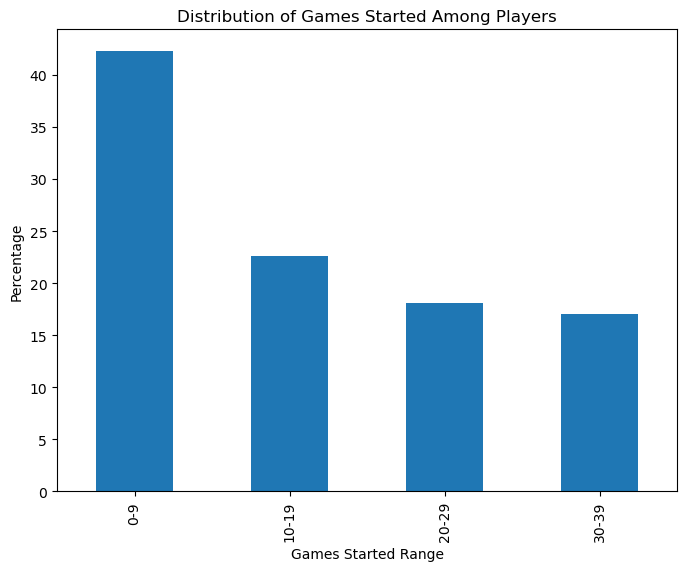

In [148]:
# plot distribution
plt.figure(figsize = (8,6))
distribution.plot(kind = 'bar')
plt.title("Distribution of Games Started Among Players")
plt.xlabel('Games Started Range')
plt.ylabel('Percentage')
plt.show()

# Correlation and Regression

### 6.Is there a significant correlation between minutes played and goals scored?


In [151]:
# inspect data
new_epl_data.head()

,Rank,Player,Team,Game_Played,Games_Started,Minutes_Played,Goals_Scored,Assist,Shot,Shots_On_Goal,Position,Games_Started_Range
2,87.0,Aaron Cresswell,West Ham United,31.0,31.0,2730.0,3.0,0.0,14.0,5.0,Defender,30-39
6,298.0,Aaron Ramsdale,Bournemouth,37.0,37.0,3330.0,0.0,1.0,0.0,0.0,Goalkeeper,30-39
9,363.0,Aaron Wan-Bissaka,Manchester United,35.0,34.0,3072.0,0.0,4.0,5.0,1.0,Defender,30-39
11,83.0,Abdoulaye Doucouré,Watford,37.0,36.0,3167.0,4.0,2.0,41.0,12.0,Midfielder,30-39
14,530.0,Adalberto Peñaranda,Watford,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Forward,0-9


In [152]:
minutes_played= new_epl_data['Minutes_Played']
goals_scored = new_epl_data['Goals_Scored']

<Axes: xlabel='Minutes_Played', ylabel='Goals_Scored'>

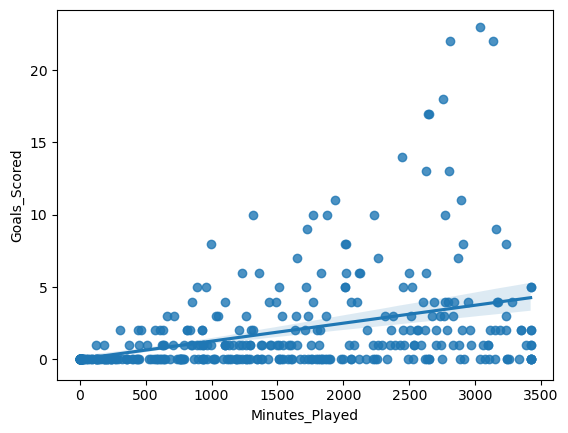

In [153]:
sns.regplot(data = new_epl_data,x= 'Minutes_Played',y= 'Goals_Scored')

In [154]:
# Calculate Pearson correlation coefficient
from scipy.stats import pearsonr
corr_coef,p_value= pearsonr(minutes_played,goals_scored)
print(f'Pearson Correlation Coefficient:{corr_coef:4f}')
print(f'P-value:{p_value:4f}')

Pearson Correlation Coefficient:0.402802
P-value:0.000000


In [155]:
# Interpretation
#The P-value is indicating that as minutes played increases,goals scored tend to increase 
#0.402802 is generally considered a moderate positive correlation.This indicates that as minutes played increase,goals scored tend to increase, but relationship is not extremely strong

In [156]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

In [157]:
goals_scored.shape

(381,)

In [158]:
minutes_played.shape

(381,)

In [159]:
X= np.array(new_epl_data['Minutes_Played']).reshape(-1,1)
y= np.array(goals_scored)
X_train,X_test,y_train,y_test= train_test_split(X,y,random_state= 41,test_size = 0.3)
reg = LinearRegression()
reg.fit(X,y)
y_pred= reg.predict(X_test)

In [160]:
y_pred

array([1.2166191 , 2.19303415, 0.01659755, 0.86630225, 0.5756138 ,
       0.59548993, 1.7321563 , 0.03523142, 3.28125245, 0.01659755,
       1.51351884, 0.1669108 , 0.10976692, 1.54705981, 0.01659755,
       0.0240511 , 0.5756138 , 0.01659755, 1.72221824, 0.0178398 ,
       4.02909196, 1.6278066 , 1.98309249, 1.58432756, 3.9297113 ,
       1.54209078, 3.30858213, 2.12719445, 3.26634535, 0.01659755,
       0.01659755, 4.04151454, 4.17319393, 0.01659755, 3.9148042 ,
       3.35081891, 0.047654  , 0.51474314, 3.0352853 , 3.06634175,
       1.49115819, 2.00545314, 1.687435  , 3.63032704, 0.93711097,
       2.2153948 , 2.00296862, 0.27374502, 0.18057565, 4.04151454,
       0.01659755, 2.1408593 , 2.52471712, 2.34831644, 0.41660473,
       2.30111062, 0.03647368, 3.59430155, 0.79549352, 3.06634175,
       0.01659755, 1.98433475, 0.37809472, 0.46629506, 1.17935135,
       0.55697992, 4.26512104, 1.81414535, 2.37688838, 0.8079161 ,
       2.1942764 , 1.36941687, 1.05388325, 4.26512104, 0.46629

### 7.How does the number of shots on goal relate to assists?

In [162]:
new_epl_data.head()

,Rank,Player,Team,Game_Played,Games_Started,Minutes_Played,Goals_Scored,Assist,Shot,Shots_On_Goal,Position,Games_Started_Range
2,87.0,Aaron Cresswell,West Ham United,31.0,31.0,2730.0,3.0,0.0,14.0,5.0,Defender,30-39
6,298.0,Aaron Ramsdale,Bournemouth,37.0,37.0,3330.0,0.0,1.0,0.0,0.0,Goalkeeper,30-39
9,363.0,Aaron Wan-Bissaka,Manchester United,35.0,34.0,3072.0,0.0,4.0,5.0,1.0,Defender,30-39
11,83.0,Abdoulaye Doucouré,Watford,37.0,36.0,3167.0,4.0,2.0,41.0,12.0,Midfielder,30-39
14,530.0,Adalberto Peñaranda,Watford,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Forward,0-9


In [163]:
shots_on_goal=np.array(new_epl_data['Shots_On_Goal'])
assists=np.array(new_epl_data['Assist'])

In [164]:
import numpy as np
from scipy.stats import pearsonr

# Assuming shots_on_goal and assists are numpy arrays
corr, _ = pearsonr(shots_on_goal, assists)
print(f"Pearson Correlation: {corr}")


Pearson Correlation: 0.5430854684547406


In [165]:
#A Pearson correlation coefficient of 0.543 indicates a moderate positive relationship between the number of shots on goal and assists. Here's what it means:

#Direction: Since the correlation is positive, it suggests that as the number of shots on goal increases, the number of assists tends to increase as well.

#Strength: The value of 0.543 indicates a moderate strength in the relationship. It's not very weak (closer to 0) but also not a very strong correlation (closer to 1). While there is some degree of association, it's not perfect. Other factors could also be influencing assists, and shots on goal alone don't fully explain the variation in assists.

#Interpretation:
#In practical terms, players who take more shots on goal might have a higher likelihood of also providing assists, but the relationship is not extremely strong.
#There is still a fair amount of variability in assists that cannot be explained just by shots on goal, meaning other factors or randomness could play a significant role.
#This correlation gives a useful insight into a moderate tendency, but further analysis (e.g., regression, additional variables) could help understand the relationship more deeply.


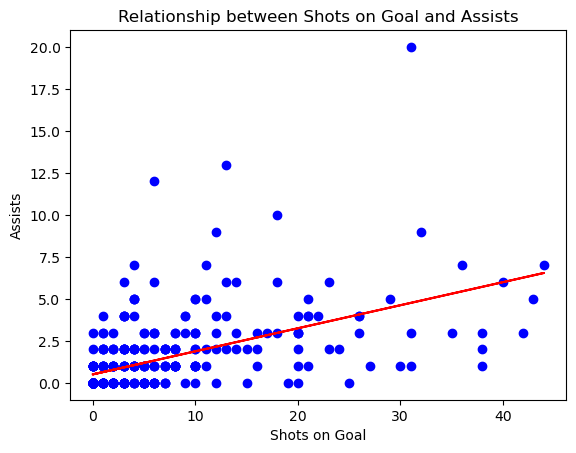

In [166]:
# Regression analysis
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Reshape shots_on_goal to be 2D for sklearn
X = shots_on_goal.reshape(-1, 1)
y = assists

# Fit the regression model
reg = LinearRegression()
reg.fit(X, y)

# Predict assists based on shots on goal
y_pred = reg.predict(X)

# Plot the relationship
plt.scatter(shots_on_goal, assists, color='blue')
plt.plot(shots_on_goal, y_pred, color='red')
plt.xlabel('Shots on Goal')
plt.ylabel('Assists')
plt.title('Relationship between Shots on Goal and Assists')
plt.show()


In [167]:
# Slope of the Line:The line has a positive slope (slants upwards), it indicates a positive relationship,
# meaning that as shots on goal increase, the number of assists also tends to increase.

### 8.Can we predict goals scored based on minutes played and shots on goal?

In [169]:
X= new_epl_data[['Minutes_Played','Shot']]  # Combine the two features into a 2D array
y = new_epl_data['Goals_Scored']  # Target variable (goals scored)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the regression model
reg = LinearRegression()
reg.fit(X_train, y_train)

# Predict goals scored on the test set
y_pred = reg.predict(X_test)

# Evaluate the model performance
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared (R^2) Score: {r2}")

# Optional: view the model coefficients
print("Intercept:", reg.intercept_)
print("Coefficients:", reg.coef_)


Mean Squared Error: 1.5100900737889293
R-squared (R^2) Score: 0.7904984870249607
Intercept: -0.27954986841281926
Coefficients: [-0.00038864  0.21455867]


In [170]:
1. Mean Squared Error (MSE): 1.51
The MSE represents the average squared difference between the actual and predicted number of goals scored.
A value of 1.51 means that on average, the model’s predictions are off by about 1.51 squared units. Since the MSE is in squared units, you might want to compute the root mean squared error (RMSE) for a more interpretable metric in the same units as your data (goals scored):
𝑅𝑀𝑆𝐸=
1.51
≈
1.23
RMSE= 
1.51
​
 ≈1.23
This indicates that the predictions of goals scored are off by about 1.23 goals on average.

2. R-squared (R²) Score: 0.7905
The R² score of 0.79 means that about 79% of the variance in goals scored can be explained by the two independent variables, minutes played and shots on goal.
This is a good fit, indicating that your model is doing a good job at explaining the variation in goals scored with these two variables. The remaining 21% of the variance might be due to other factors not included in the model (e.g., player skills, tactics, other metrics).
3. Intercept: -0.2795
The intercept of -0.2795 means that if both minutes played and shots on goal are zero, the model predicts a slight negative number of goals scored (which isn't realistic, but it's due to the nature of linear models).
The intercept mainly adjusts the line to fit the data but doesn't have a practical meaning in this context.
4. Coefficients:
Coefficient for minutes played (-0.00039): This value means that for every additional minute a player is on the field (holding shots on goal constant), the number of goals scored is expected to decrease very slightly by 0.00039 goals. This coefficient is quite small, suggesting that minutes played alone may not be a strong predictor of goals scored.
Coefficient for shots on goal (0.2146): This value means that for every additional shot on goal (holding minutes played constant), the number of goals scored is expected to increase by about 0.2146 goals. This suggests that shots on goal is a much stronger predictor of goals scored compared to minutes played.
Key Takeaways:
Shots on goal has a stronger and more positive effect on goals scored than minutes played.
The R² score of 0.79 indicates that your model explains a large portion of the variability in goals scored, which means the predictors (shots on goal and minutes played) are quite relevant.
Minutes played has a very small and slightly negative impact, which might indicate that time on the field without increasing the number of shots doesn't strongly affect the outcome in terms of goals scored.
Further Steps:
You can consider exploring other variables like pass accuracy, distance covered, or attacking involvement to see if they further improve the prediction.
You could also try interaction terms between variables (e.g., interactions between minutes played and shots on goal) to see if there's a combined effect on goals scored.

SyntaxError: invalid character '’' (U+2019) (497094402.py, line 3)

### 9.Does the number of games started impact player performance (goals, assists, shots on goal)?

In [ ]:
# correlation between games started and assists
games_started= new_epl_data['Games_Started']
goals_scored = new_epl_data['Goals_Scored']

In [ ]:
sns.regplot(data= 'new_epl_data', x=games_started,y=goals_scored)

In [ ]:
# The correlation between games started and goals scored is quite weak, however we observe  that as games started increases
# there's a gradual increase in goals scored

In [ ]:
# correlation between games started and assists
games_started= new_epl_data['Games_Started']
assists = new_epl_data['Assist']

In [ ]:
sns.regplot(data= 'new_epl_data', x= games_started,y=assists)

In [ ]:
# The correlation between games started and goals scored is quite weak, however we observe  that as games started increases
# there's a gradual increase in assist

In [186]:
# correlation between games started and assists
games_started= new_epl_data['Games_Started']
shots_on_goal = new_epl_data['Shots_On_Goal']

<Axes: xlabel='Games_Started', ylabel='Shots_On_Goal'>

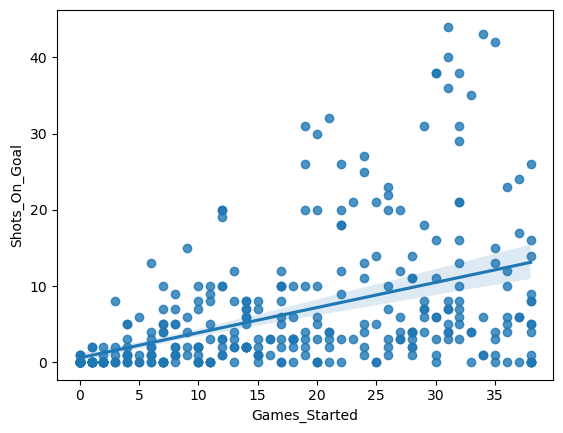

In [188]:
sns.regplot(data= new_epl_data, x= games_started,y= shots_on_goal)

In [ ]:
# Theres a more positive correlation between games started and goals scored compared to goals and assists

# Team Performance

### 10.Which team has the highest average goals scored per game?

In [ ]:
highest_average_goals_per_game=new_epl_data.groupby('Team')['Goals_Scored'].mean()/38

In [ ]:
highest_average_goals_per_game.sort_values(ascending =False)

In [ ]:
# Leicester City has the highest average goals scored per game

### 11. Do teams with more players scoring 5+ goals perform better in the league?

In [ ]:
new_epl_data[new_epl_data['Goals_Scored']> 5]['Team'].value_counts().sort_values( ascending = False)

In [ ]:
# In the 2015/2016 season the only team within the top 4 with more 2 players scoring more than 5 goals was Manchester city   

### 12. Is there a relationship between team success (e.g., points, position) and player performance metrics?

In [ ]:
# based on goals
player_performance_based_on_goals=new_epl_data.sort_values(by = 'Goals_Scored', ascending =False)
player_performance_based_on_goals.head(10)['Team'].value_counts()

In [ ]:
# Among the top 10 goals scorers, Leicester City,Arsenal and Manchester City had players contributing to their 1st,2nd and 4th position respectively

In [ ]:
# based on assists
player_performance_based_on_assists=new_epl_data.sort_values(by = 'Assist', ascending =False)
player_performance_based_on_assists.head(10)['Team'].value_counts()

In [ ]:
# Among the top 10 assists only Manchester City had players contributing to their 4th position

# Descriptive Analysis

### 13.Compare the performance of top scorers


In [ ]:
# top 10 goal scorers

In [ ]:
top_10=player_performance_based_on_goals.head(10)

In [ ]:
# top players performance based on assists
top_10_assist_performance = top_10.sort_values(by = 'Assist',ascending =False)
top_10_assist_performance

In [ ]:
# The player within the top 10 goal scorers is the only  midfielder within the list 

### 14.  How do midfielders from different teams compare in terms of assists and shots on goal?

In [190]:
midfielder_performance_based_on_goals= new_epl_data[new_epl_data['Position']=='Midfielder'].sort_values(by= 'Goals_Scored',ascending =False)

In [192]:
teams_midfielders_performance_based_on_goals=midfielder_performance_based_on_goals['Team'].value_counts()

In [194]:
teams=teams_midfielders_performance_based_on_goals.keys()
values=teams_midfielders_performance_based_on_goals.values

In [196]:
values

array([10, 10,  9,  8,  7,  7,  7,  7,  7,  7,  6,  6,  6,  6,  6,  6,  5,
        5,  4,  3], dtype=int64)

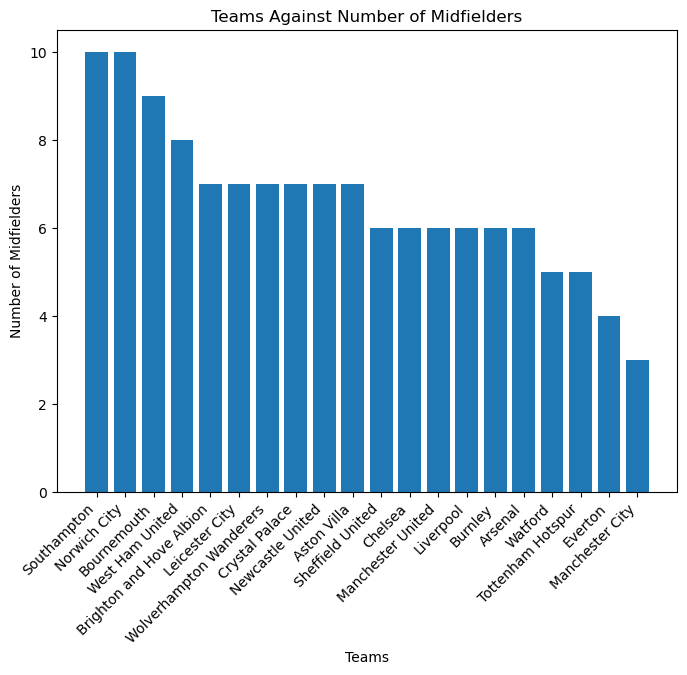

In [198]:
labels = teams
values =values
plt.figure(figsize=(8,6))
plt.bar(labels,values)
plt.title('Teams Against Number of Midfielders')
plt.xlabel('Teams')
plt.ylabel('Number of Midfielders')
plt.xticks(rotation=45, ha = 'right')
plt.show()



In [ ]:
# Southampton has the highest amount of midfielders being goal scorers

In [204]:
midfielders_performance_based_on_assists= new_epl_data[new_epl_data['Position']=='Midfielder'].sort_values(by= 'Assist',ascending =False)

In [208]:
midfielders_performance_based_on_assists
midfielders_performance_based_on_assists =midfielders_performance_based_on_assists['Team'].value_counts()
teams=midfielders_performance_based_on_assists.keys()
values=midfielders_performance_based_on_assists.values

In [214]:
midfielders_performance_based_on_assists

Team
Norwich City                10
Southampton                 10
Bournemouth                  9
West Ham United              8
Crystal Palace               7
Brighton and Hove Albion     7
Newcastle United             7
Wolverhampton Wanderers      7
Aston Villa                  7
Leicester City               7
Chelsea                      6
Sheffield United             6
Manchester United            6
Liverpool                    6
Arsenal                      6
Burnley                      6
Watford                      5
Tottenham Hotspur            5
Everton                      4
Manchester City              3
Name: count, dtype: int64

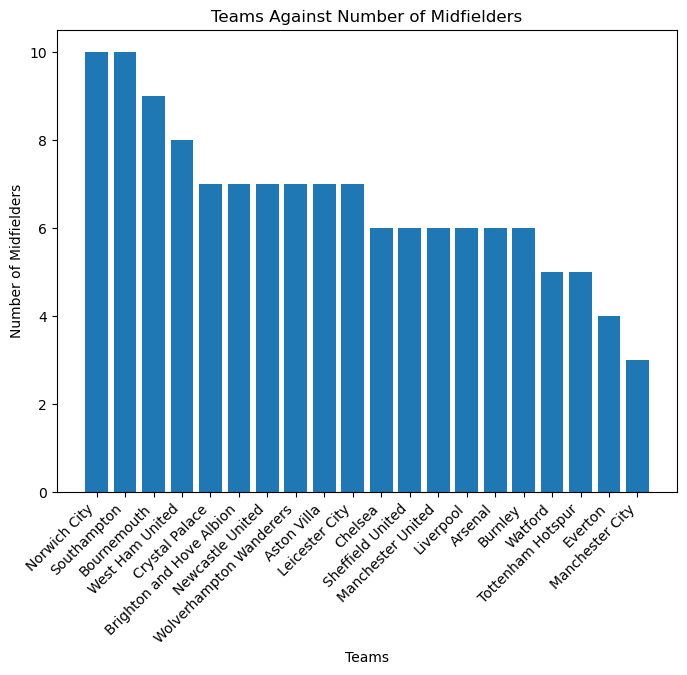

In [216]:
labels = teams
values =values
plt.figure(figsize=(8,6))
plt.bar(labels,values)
plt.title('Teams Against Number of Midfielders')
plt.xlabel('Teams')
plt.ylabel('Number of Midfielders')
plt.xticks(rotation=45, ha = 'right')
plt.show()

### END 